## Importing Libraries

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split

## Load Datasets

In [33]:
data1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/dataset.xlsx")

In [34]:
data2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/depression_dataset_reddit_cleaned.csv")

## Exploratory Data Analysis (EDA)

Analysing the nature of the data in both datasets

### Data 1
---

In [35]:
data1.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [36]:
data1.shape

(6982, 2)

In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6972 non-null   object 
 1   label   6980 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB


In [38]:
data1.isnull().sum()

text     10
label     2
dtype: int64

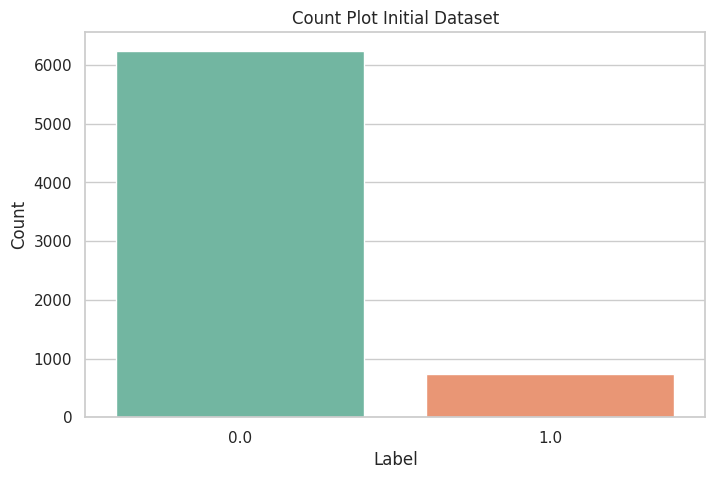

In [39]:
# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Count plot
sns.countplot(x='label', data=data1, palette="Set2")

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count Plot Initial Dataset')

# Show the plot
plt.show()

In [40]:
# Check the balance of the classes
print(data1['label'].value_counts())

0.0    6247
1.0     733
Name: label, dtype: int64


### Data 2 Analysis
---

In [41]:
data2.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [42]:
data2.shape

(7731, 2)

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [44]:
print("\n Checking for Any null values: ")
data2.isnull().sum()


 Checking for Any null values: 


clean_text       0
is_depression    0
dtype: int64

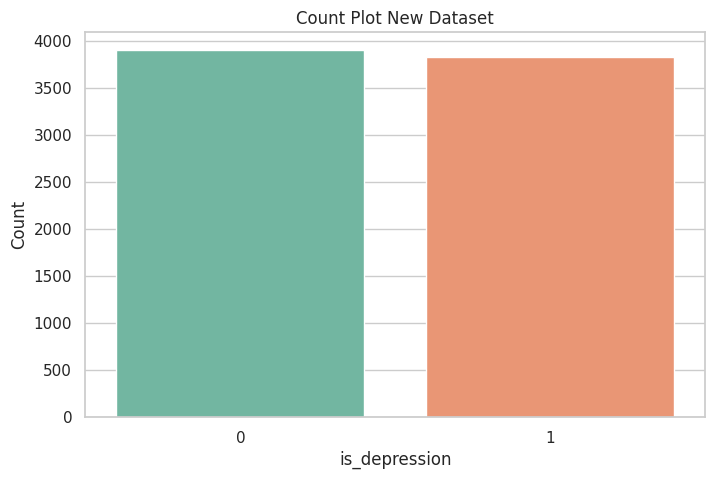

In [45]:
# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Count plot
sns.countplot(x='is_depression', data=data2, palette="Set2")

# Adding labels and title
plt.xlabel('is_depression')
plt.ylabel('Count')
plt.title('Count Plot New Dataset')

# Show the plot
plt.show()

In [46]:
# Check the balance of the classes
print(data2['is_depression'].value_counts())

0    3900
1    3831
Name: is_depression, dtype: int64


### Percentage Counts

In [47]:
class_counts = data1['label'].value_counts(normalize=True) * 100
percentage_difference = abs(class_counts.diff().iloc[-1])

print("Data1 Class distribution")
print(f"Class 0 Percentage: {class_counts.iloc[0]}%")
print(f"Class 1 Percentage: {class_counts.iloc[1]}%")
print(f"Percentage Difference: {percentage_difference}%")

Data1 Class distribution
Class 0 Percentage: 89.49856733524355%
Class 1 Percentage: 10.501432664756447%
Percentage Difference: 78.9971346704871%


In [48]:
class_counts = data2['is_depression'].value_counts(normalize=True) * 100
percentage_difference = abs(class_counts.diff().iloc[-1])

print("Data2 Class distribution")
print(f"Class 0 Percentage: {class_counts.iloc[0]}%")
print(f"Class 1 Percentage: {class_counts.iloc[1]}%")
print(f"Percentage Difference: {percentage_difference}%")

Data2 Class distribution
Class 0 Percentage: 50.446255335661625%
Class 1 Percentage: 49.55374466433838%
Percentage Difference: 0.8925106713232438%


### Insights From EDA
- Dataset 1 is highly biased towards the 0 class with a percentage difference of 79%
- However, Dataset 2 is evenly balanced with a percentage difference of 0.9%

Therefore the ideal dataset is dataset is dataset 2.

### Preprocessing
- Dataset 2 is already clean and previous cell runs confirms this.
- Also, Dataset 2 has already undergone nltk vocabulary classification to remove unneeded characters.

# Preparing Data for Training

## Feature Engineering

The evaluation is conducted in the context of a Natural Language Processing (NLP) problem where the primary features comprise the clean_text labels, and the target variable is the binary classification label is_depressed. In this context, the valuable features are all the features present in the dataset.

## Spliting the Data

In [49]:
data2.replace(1, "yes", inplace=True)
data2.replace(0, "no", inplace=True)
data2.tail(8)

,clean_text,is_depression
7723,i hate being awake going to school western civ...,no
7724,ha just discovered the downside of going away ...,no
7725,ophelia haha sorreh i try spek normalz now k,no
7726,is that snow,no
7727,moulin rouge mad me cry once again,no
7728,trying to shout but can t find people on the list,no
7729,ughh can t find my red sox hat got ta wear thi...,no
7730,slept wonderfully finally tried swatching for ...,no


In [80]:
temp_df, test_df = train_test_split(data2, test_size=0.2, random_state=42)
train_df, validation_df = train_test_split(temp_df, test_size=0.2, random_state=42)

In [81]:
train_df.shape[0]

4947

In [109]:
# Step 1: Stratified Split
train_data, test_val_data = train_test_split(data2, test_size=0.4, stratify=data2['is_depression'])

# Step 2: Limit Size
train_data = train_data.sample(1000, random_state=42)  # Limit to 1000 samples for training
test_data, val_data = train_test_split(test_val_data, test_size=0.5, stratify=test_val_data['is_depression'])
test_data = test_data.sample(100, random_state=42)  # Limit to 100 samples for testing
val_data = val_data.sample(100, random_state=42)  # Limit to 100 samples for validation

## Confirming that the classes are evenly distributed in validation, training and testing data

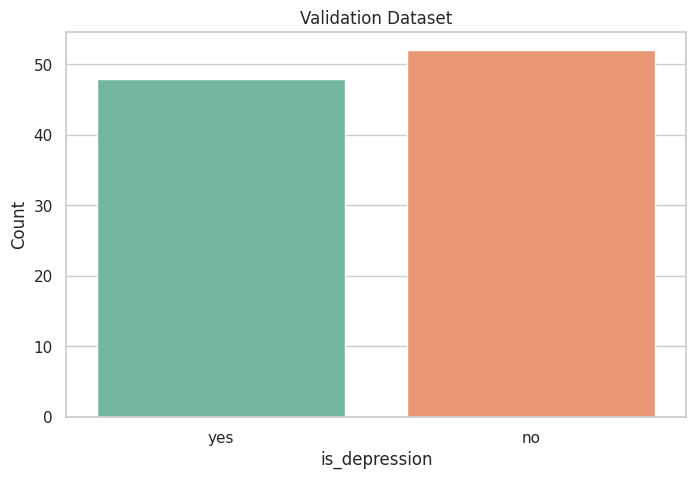

In [110]:
# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Count plot
sns.countplot(x='is_depression', data=val_data, palette="Set2")

# Adding labels and title
plt.xlabel('is_depression')
plt.ylabel('Count')
plt.title('Validation Data')

# Show the plot
plt.show()

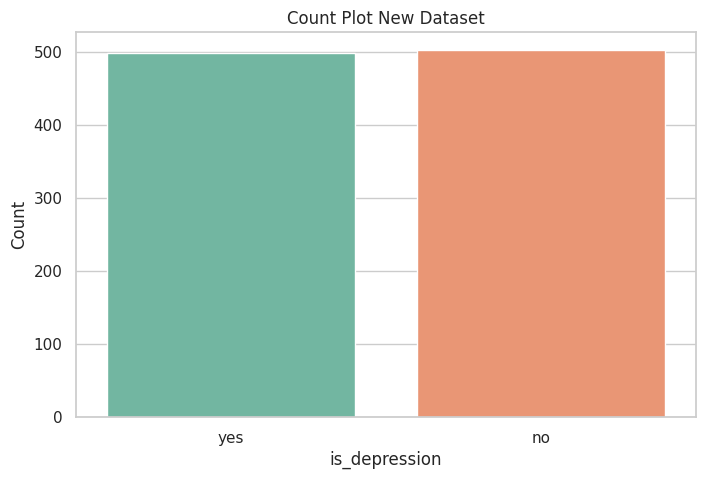

In [111]:
# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Count plot
sns.countplot(x='is_depression', data=train_data, palette="Set2")

# Adding labels and title
plt.xlabel('is_depression')
plt.ylabel('Count')
plt.title('Training Data')

# Show the plot
plt.show()

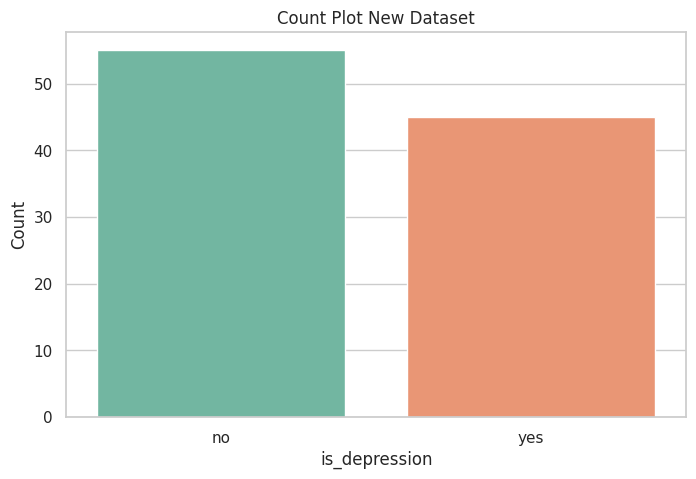

In [113]:
# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Count plot
sns.countplot(x='is_depression', data=test_data, palette="Set2")

# Adding labels and title
plt.xlabel('is_depression')
plt.ylabel('Count')
plt.title('Testing Data')

# Show the plot
plt.show()

## Converting Dataframes into Google's Palm2 API format

In [87]:
def convert_to_palm2_format(df):
    """
    Converts a Pandas dataframe to PaLM2 format.

    Args:
        df (pandas.DataFrame): The dataframe to convert.

    Returns:
        list: A list of dictionaries in PaLM2 format.
    """

    palm2_data = []
    for index, row in df.iterrows():
        palm2_data.append({
            "input_text": row["clean_text"],
            "output_text": row["is_depression"]
        })

    return palm2_data

In [88]:
def convert_to_palm2_test_format(df):
    """
    Converts a Pandas dataframe to PaLM2 testing format.

    Args:
        df (pandas.DataFrame): The dataframe to convert.

    Returns:
        list: A list of dictionaries in PaLM2 format.
    """

    palm2_data = []
    for index, row in df.iterrows():
        palm2_data.append({
            "prompt": row["clean_text"],
            "ground_truth": row["is_depression"]
        })

    return palm2_data

In [89]:
def save_to_jsonl(data, filename):
    """
    Saves a list of dictionaries to a JSON Lines file.

    Args:
        data (list): A list of dictionaries to save.
        filename (str): The filename to save the data to.
    """

    with open(filename, 'w') as f:
        for item in data:
            json.dump(item, f)
            f.write('\n')

In [114]:
training_palm2_data = convert_to_palm2_format(train_data)
validation_palm2_data = convert_to_palm2_format(val_data)
test_palm2_data = convert_to_palm2_test_format(test_data)

### Saving the new data format to be uploaded on Google Cloud

In [115]:
save_to_jsonl(training_palm2_data, "/content/drive/MyDrive/Colab Notebooks/training_data.jsonl")
save_to_jsonl(validation_palm2_data, "/content/drive/MyDrive/Colab Notebooks/validation_data.jsonl")
save_to_jsonl(test_palm2_data, "/content/drive/MyDrive/Colab Notebooks/testing_data.jsonl")

# Google Cloud AutoML Training

## Installing Dependencies

In [19]:
!pip -q install "shapely<2.0.0"
!pip -q install google-cloud-aiplatform --upgrade

## Model Training Results (Screenshots from Google Cloud)


In [9]:
from IPython.display import Image

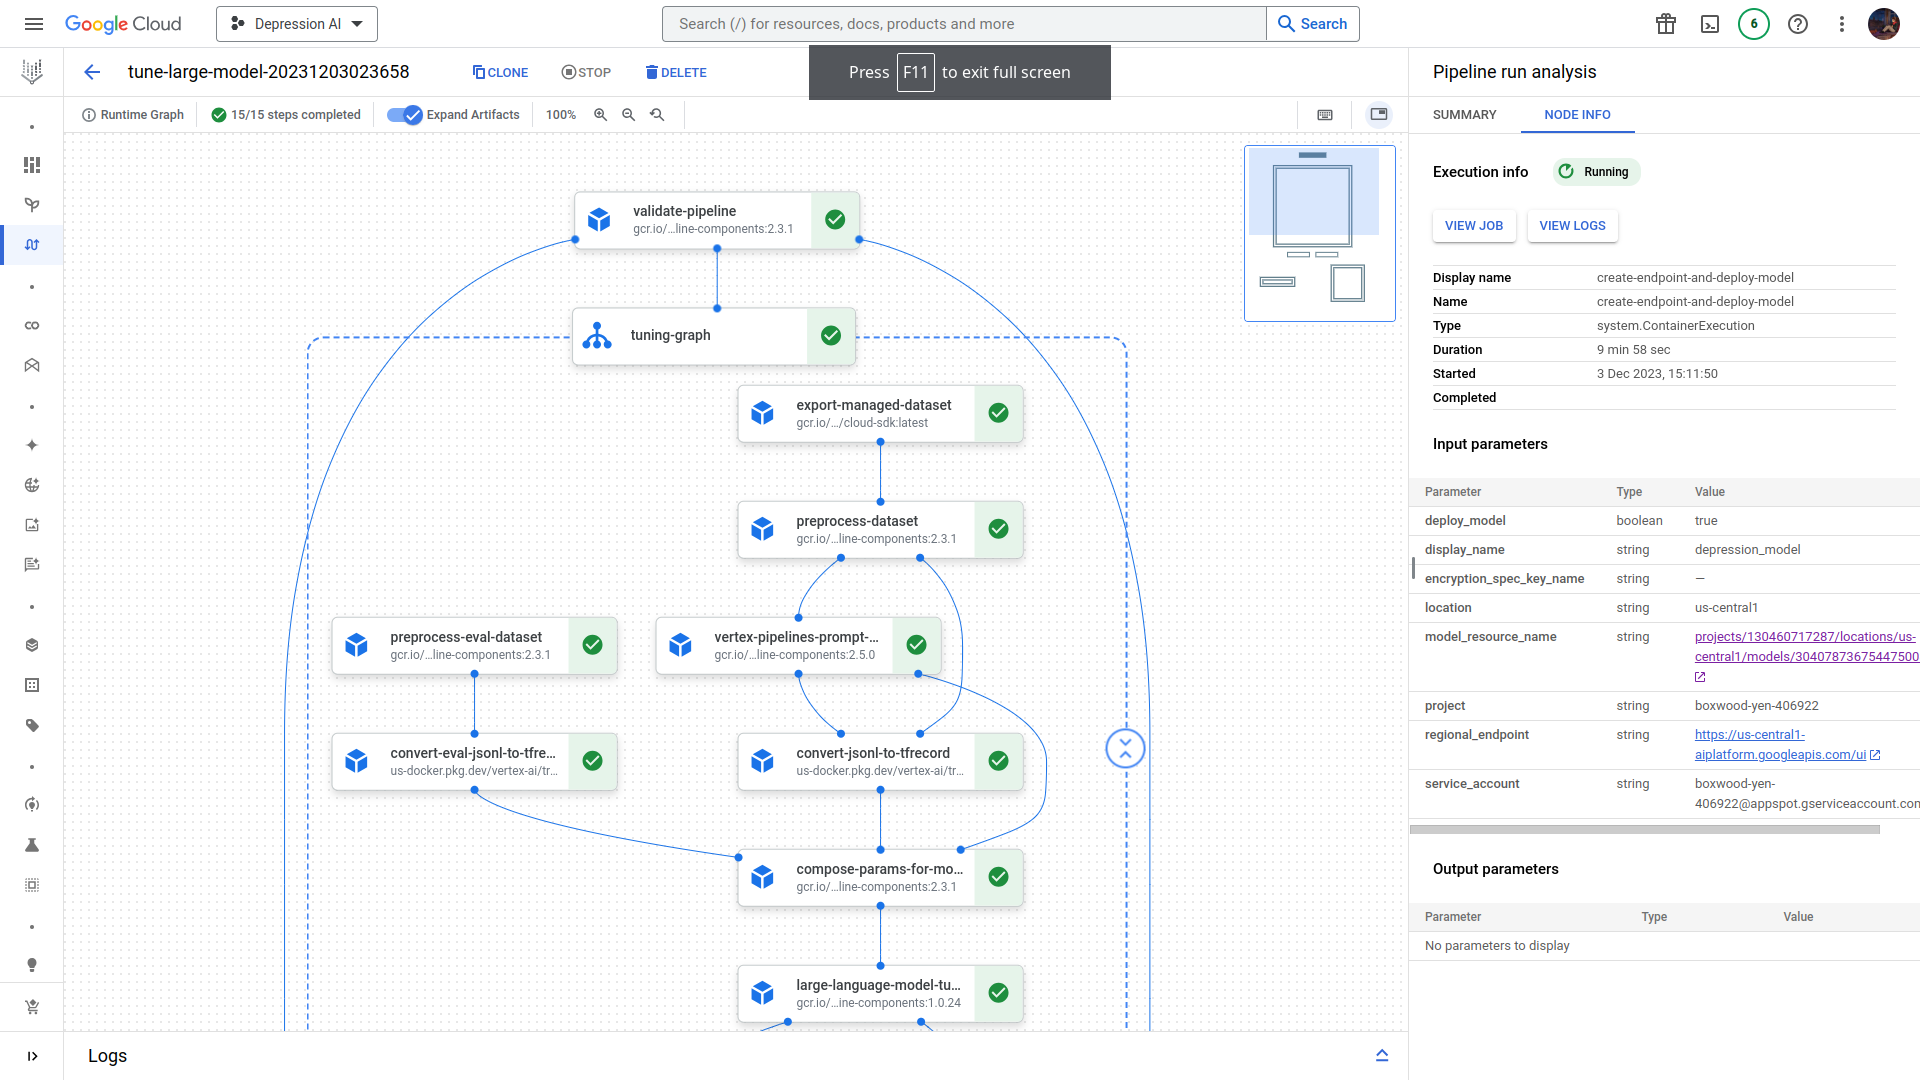

In [8]:
Image('/content/drive/MyDrive/Colab Notebooks/image1.png')

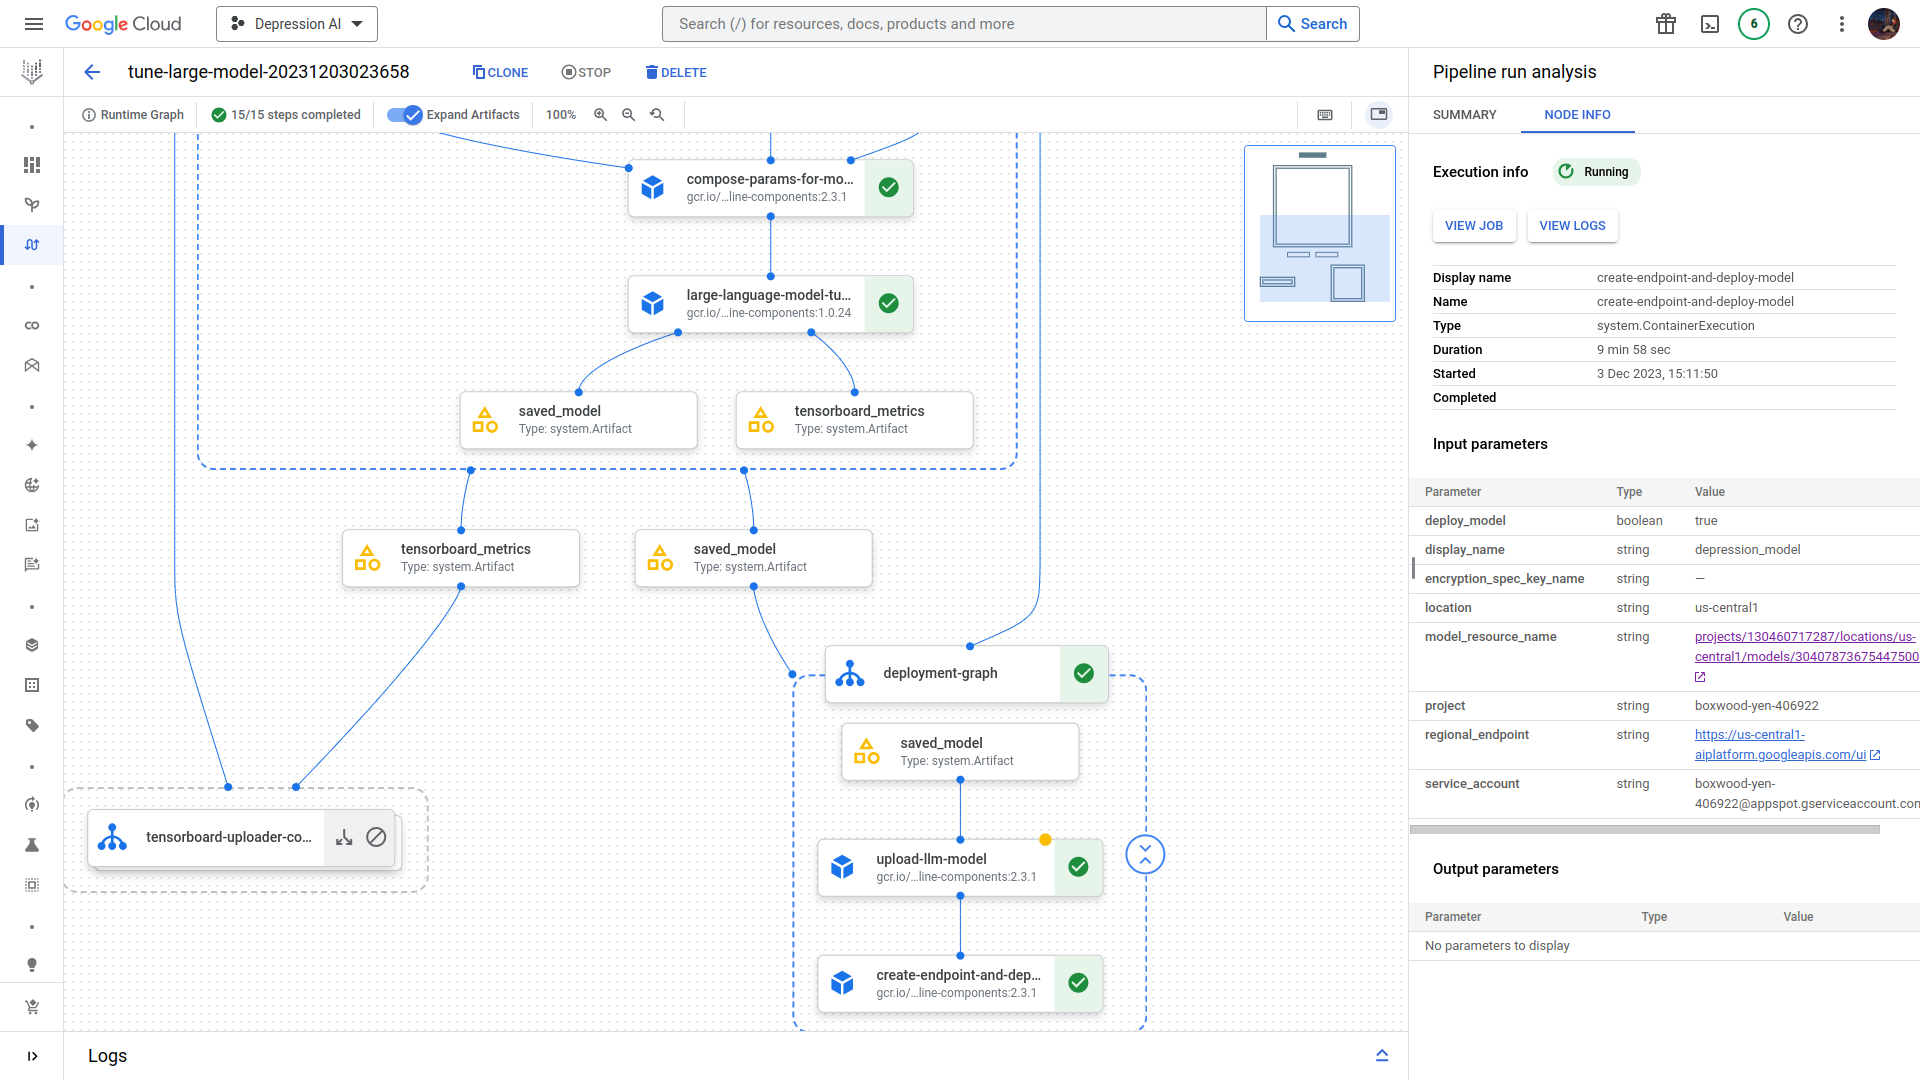

In [10]:
Image('/content/drive/MyDrive/Colab Notebooks/image2.png')

## Using fine-tuned model from PaLM API

In [20]:
PROJECT_ID = "boxwood-yen-406922"
REGION = "us-central1"
BUCKET_URI = "gs://002_depression_detection"
MODEL_NAME = "depression_model"

In [11]:
from google.colab import auth
auth.authenticate_user()

In [12]:
!gcloud config set project {PROJECT_ID}

Updated property [core/project].


In [21]:
from google.cloud import aiplatform

aiplatform.init(project=PROJECT_ID, staging_bucket=BUCKET_URI)

In [22]:
models = aiplatform.Model.list(
    filter=f"display_name={MODEL_NAME}", order_by="create_time"
)

In [23]:
models

 resource name: projects/130460717287/locations/us-central1/models/304078736754475008]

In [29]:
depression_model = models[0]


In [34]:
depression_model

resource name: projects/130460717287/locations/us-central1/models/304078736754475008

## Model Evaluation & Accuracy

In [68]:
import vertexai
from vertexai.language_models import TextGenerationModel

vertexai.init(project="130460717287", location="us-central1")
parameters = {
    "candidate_count": 1,
    "max_output_tokens": 1024,
    "temperature": 0.2,
    "top_p": 0.8,
    "top_k": 40
}
model = TextGenerationModel.from_pretrained("text-bison@001")
model = model.get_tuned_model("projects/130460717287/locations/us-central1/models/304078736754475008")

def predict(prompt):
    response = model.predict(
        f"""Analyse the input text and determine whether the person is depressed or not.

    input: wednesday my b day don t know what do
    output: no

    input: Depression sucks especially accompanied by insomnia and chronic pain chronic life.
    output: yes

    input: {prompt}
    output:
    """,
        **parameters
    )
    return response.text

In [82]:
with open("/content/drive/MyDrive/Colab Notebooks/testing_data.jsonl") as f:
    file = f.readlines()

In [83]:
list_file = list(file)

In [84]:
for i in range(len(list_file)):
    list_file[i] = list_file[i].strip()

In [85]:
for i in range(len(list_file)):
    list_file[i] = json.loads(list_file[i])

In [58]:
list_file

[{'prompt': 'wednesday my b day don t know what do', 'ground_truth': 'no'},
 {'prompt': 'this sickness is making it impossible for me sleep that and how hot i am',
  'ground_truth': 'no'},
 {'prompt': 'im up guy lloll', 'ground_truth': 'no'},
 {'prompt': 'heading to bed have to be at work in hour', 'ground_truth': 'no'},
 {'prompt': 'amanorris wow that last tweet made me seem like a giant sexist sorry about that',
  'ground_truth': 'no'},
 {'prompt': 'i wish it wa just depression', 'ground_truth': 'yes'},
 {'prompt': 'newkidsfan awwwww ur gunna make me cry i miss him so much he ha blessed me w so much love and memory',
  'ground_truth': 'no'},
 {'prompt': 'nchokkan http www mycomicshop com search tid 9 0 but all say not in stock',
  'ground_truth': 'no'},
 {'prompt': 'funguyzz if you no find this guy dope and funny abeeg you never chop since yesterday or depression hook you plane just stop for air when no be say na magnito be pilot',
  'ground_truth': 'yes'},
 {'prompt': 'is at work x'

In [69]:
predict(list_file[1]["prompt"])

'no'

In [70]:
list_file[1]["prompt"]

'this sickness is making it impossible for me sleep that and how hot i am'

In [71]:
list_file[1]["ground_truth"]

'no'

In [86]:
expected_responses = []

for item in list_file:
    expected_responses.append(item["ground_truth"])

In [80]:
expected_responses

['no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no']

In [90]:
import time

generated_responses = []

for item in list_file:
    time.sleep(2)
    generated_responses.append(predict(item["prompt"]))

In [91]:
len(expected_responses)

100

In [93]:
len(generated_responses)

100

Convert responses to binary numbers:
- yes: 1
- no: 0

In [94]:
expected_res_bin = [1 if label == "yes" else 0 for label in expected_responses]

In [95]:
generated_res_bin = [1 if label == "yes" else 0 for label in generated_responses]

## 1. AuPRC (Area under the Precision-Recall Curve):


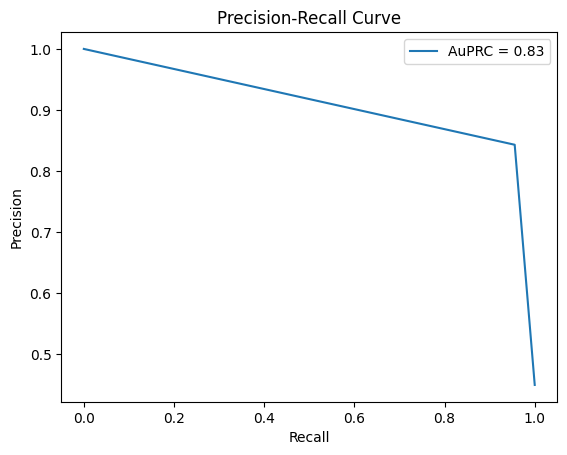

In [96]:
from sklearn.metrics import average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt

average_precision = average_precision_score(expected_res_bin, generated_res_bin)
precision, recall, _ = precision_recall_curve(expected_res_bin, generated_res_bin)

plt.plot(recall, precision, label=f'AuPRC = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**AuPRC score: 0.83**

- The score shows that the model is able to achieve a relatively high precision while maintaining a good balance with recall.

## 2. Log Loss

In [97]:
from sklearn.metrics import log_loss
import numpy as np

logloss = log_loss(expected_res_bin, generated_res_bin)
print(f'Log Loss: {logloss:.4f}')


Log Loss: 3.6044


**Log Loss: 3.6044**

- A log loss value ranges from 0 to infinity, so a value of 3.6044 is not bad, but there is room to improve and reduce it further.

## 3. Recall, Precision, F1 Score:


In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score

recall = recall_score(expected_res_bin, generated_res_bin)
precision = precision_score(expected_res_bin, generated_res_bin)
f1 = f1_score(expected_res_bin, generated_res_bin)

print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')


Recall: 0.9556
Precision: 0.8431
F1 Score: 0.8958


**Recall: 0.9556**

- 0.9556 recall value indicates that the model is effective at capturing individuals who actually have depression.

**Precision: 0.8431**

- This indicates that 84.31% of the predictions made by the model are true positives.

**F1 Score: 0.8958**

- F1 score provides a balanced measure of both false positives and false negatives.
- The score of 0.8958 suggests a good balance between precision and recall.

## 4. Confusion Matrix

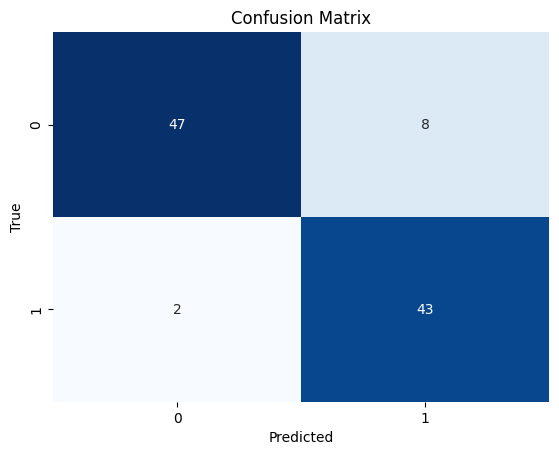

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(expected_res_bin, generated_res_bin)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

- Confusion matrix shows how often a model correctly predicted a result.
- **True Positives (TP):** 43 instances were correctly predicted as class 1 (positive).
- **True Negatives (TN):** 47 instances were correctly predicted as class 0 (negative).
- **False Positives (FP):** 8 instances were incorrectly predicted as class 1 (positive) but actually belong to class 0 (negative).
- **False Negatives (FN):** 2 instances were incorrectly predicted as class 0 (negative) but actually belong to class 1 (positive).

In general, the model is performing very well in identifying whether a person has depression or not.